In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
%matplotlib inline

In [3]:
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!']) #create series
s

0                7
1       Heisenberg
2             3.14
3      -1789710578
4    Happy Eating!
dtype: object

In [4]:
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'], #create series with custom index
              index=['A', 'Z', 'C', 'Y', 'E'])
s

A                7
Z       Heisenberg
C             3.14
Y      -1789710578
E    Happy Eating!
dtype: object

In [5]:
# construct as dictionary. index is the key, data is the value. 
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100, 
     'Austin': 450, 'Boston': None}
cities = pd.Series(d)
cities

Austin            450.0
Boston              NaN
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64

In [6]:
cities['Chicago'] #use index label to access data 

1000.0

In [7]:
cities[['Chicago', 'Portland', 'San Francisco']] #accessing multiple data points

Chicago          1000.0
Portland          900.0
San Francisco    1100.0
dtype: float64

In [8]:
cities[cities < 1000] #finds and returns the data points that are less than 1000

Austin      450.0
Portland    900.0
dtype: float64

In [9]:
#explanation of syntax of boolean selectoin
less_than_1000 = cities < 1000 #returns a series of true/false
print(less_than_1000) #prints series
print('\n')
print(cities[less_than_1000])

Austin            True
Boston           False
Chicago          False
New York         False
Portland          True
San Francisco    False
dtype: bool


Austin      450.0
Portland    900.0
dtype: float64


In [10]:

# changing values using boolean logic
print(cities[cities < 1000])
print('\n')
cities[cities < 1000] = 750

print cities[cities < 1000]

Austin      450.0
Portland    900.0
dtype: float64


Austin      750.0
Portland    750.0
dtype: float64


In [11]:
print('Seattle' in cities) #check whether it is in the series
print('San Francisco' in cities)

False
True


In [12]:
cities / 3 #divide all pts by 3

Austin           250.000000
Boston                  NaN
Chicago          333.333333
New York         433.333333
Portland         250.000000
San Francisco    366.666667
dtype: float64

In [13]:
np.square(cities) #square everything in series


Austin            562500.0
Boston                 NaN
Chicago          1000000.0
New York         1690000.0
Portland          562500.0
San Francisco    1210000.0
dtype: float64

In [14]:
print(cities[['Chicago', 'New York', 'Portland']]) 
print('\n')
print(cities[['Austin', 'New York']])
print('\n')
print(cities[['Chicago', 'New York', 'Portland']] + cities[['Austin', 'New York']]) #three are Nan because only one series has the value

Chicago     1000.0
New York    1300.0
Portland     750.0
dtype: float64


Austin       750.0
New York    1300.0
dtype: float64


Austin         NaN
Chicago        NaN
New York    2600.0
Portland       NaN
dtype: float64


In [15]:

# returns a boolean series indicating which values aren't NULL
cities.notnull()

Austin            True
Boston           False
Chicago           True
New York          True
Portland          True
San Francisco     True
dtype: bool

In [16]:
# use boolean logic to grab the NULL cities
print(cities.isnull())
print('\n')
print(cities[cities.isnull()])

Austin           False
Boston            True
Chicago          False
New York         False
Portland         False
San Francisco    False
dtype: bool


Boston   NaN
dtype: float64


In [17]:
# dict of col name, series data to create dataframe
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012], #initializing data frame
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football


,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


In [18]:
from_csv = pd.read_csv('mariano-rivera.csv') #reads data from csv file. column separators are default ,
from_csv.head()

,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,WHIP,H/9,HR/9,BB/9,SO/9,SO/BB,Awards
0,1995,25,NYY,AL,5,3,0.625,5.51,19,10,2,0,0,0,67.0,71,43,41,11,30,0,51,2,1,0,301,84,1.507,9.5,1.5,4.0,6.9,1.70,NaN
1,1996,26,NYY,AL,8,3,0.727,2.09,61,0,14,0,0,5,107.2,73,25,25,1,34,3,130,2,0,1,425,240,0.994,6.1,0.1,2.8,10.9,3.82,CYA-3MVP-12
2,1997,27,NYY,AL,6,4,0.600,1.88,66,0,56,0,0,43,71.2,65,17,15,5,20,6,68,0,0,2,301,239,1.186,8.2,0.6,2.5,8.5,3.40,ASMVP-25
3,1998,28,NYY,AL,3,0,1.000,1.91,54,0,49,0,0,36,61.1,48,13,13,3,17,1,36,1,0,0,246,233,1.060,7.0,0.4,2.5,5.3,2.12,NaN


In [19]:
cols = ['num', 'game', 'date', 'team', 'home_away', 'opponent', 
        'result', 'quarter', 'distance', 'receiver', 'score_before',
        'score_after']
no_headers = pd.read_csv('peyton-passing-TDs-2012.csv', sep=',', header=None, #taking away file headers and putting in our own
                         names=cols)
no_headers.head()

,num,game,date,team,home_away,opponent,result,quarter,distance,receiver,score_before,score_after
0,1,1,2012-09-09,DEN,NaN,PIT,W 31-19,3,71,Demaryius Thomas,Trail 7-13,Lead 14-13*
1,2,1,2012-09-09,DEN,NaN,PIT,W 31-19,4,1,Jacob Tamme,Trail 14-19,Lead 22-19*
2,3,2,2012-09-17,DEN,@,ATL,L 21-27,2,17,Demaryius Thomas,Trail 0-20,Trail 7-20
3,4,3,2012-09-23,DEN,NaN,HOU,L 25-31,4,38,Brandon Stokley,Trail 11-31,Trail 18-31
4,5,3,2012-09-23,DEN,NaN,HOU,L 25-31,4,6,Joel Dreessen,Trail 18-31,Trail 25-31


In [20]:
no_headers.to_csv('path_to_file.csv') #reads from df to file

In [21]:
football.head()

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5


In [22]:
clipboard_read = pd.read_clipboard() #reads from what you copy
clipboard_read.head()

EmptyDataError: No columns to parse from file

In [ ]:
url = 'https://raw.github.com/gjreda/best-sandwiches/master/data/best-sandwiches-geocode.tsv'

# fetch the text from the URL and read it into a DataFrame
from_url = pd.read_table(url, sep='\t')
from_url.head(3)

In [ ]:
football.info() #gives info


In [ ]:
football.dtypes #tells data types of cols


In [ ]:
football.describe() #gives stats, but be careful --> it takes stats of everything numerical, even if the number represents an id number

In [ ]:
football.tail() #the last few rows


In [ ]:
football[0:2] #returns a slice

In [ ]:
football['year'].head() #gives the first 5 items of year col

In [ ]:
columns_you_want = ['year', 'team'] #to select multiple cols
print(football[columns_you_want].head())

In [ ]:
#boolean selection for rows
select_rows =football[football['year'] > 2011]
select_rows 

In [ ]:
new_index_df = football.set_index('year') #returns a new df in which year is the new index
new_index_df

#to modify the actual df, use inplace= True

In [ ]:
#select row by position
football.iloc[0]

In [ ]:
#select row by index label
new_index_df.loc[2010]

In [ ]:
#Two dataframes
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
print(left_frame)
print('\n')
print(right_frame)

In [ ]:
#inner join -- only the common keys from both are merged
pd.merge(left_frame, right_frame, on='key', how='inner')

In [ ]:
# left join -- you don't lose any columns, but everything is relative to the left
pd.merge(left_frame, right_frame, on='key', how='left')

In [ ]:
# right outer join -- relative to the right side
pd.merge(left_frame, right_frame, on='key', how='right')

In [ ]:
# outer join -- keep everything
pd.merge(left_frame, right_frame, on='key', how='outer')

In [29]:
groupby_year = football.groupby('year')
groupby_year.count().head() #returns the number of not null objects in each col, grouped by year


,team,wins,losses
year,,,
2010,2,2,2
2011,3,3,3
2012,3,3,3


In [30]:
groupby_year.sum() #after being grouped by year, wins and losses for each category totalled

,wins,losses
year,,
2010,17,15
2011,33,15
2012,25,23


In [31]:
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


In [32]:
most_rated = football.groupby('team').size().sort_values(ascending=False)[:7] #groups by team, takes the size of each category, sorts in decending orde
most_rated

team
Lions      3
Bears      3
Packers    2
dtype: int64

In [33]:
football.team.value_counts()[:7] #does the same thing as cell above

Lions      3
Bears      3
Packers    2
Name: team, dtype: int64

In [35]:
football_stats = football.groupby('team').agg({'wins': [np.size, np.mean]}) #groups by team, finds size and mean of wins col
football_stats.head()

wins           
        size       mean
team                   
Bears      3   9.666667
Lions      3   6.666667
Packers    2  13.000000

In [36]:
football_stats.sort_values([('wins', 'mean')], ascending=False).head() #sort entries by mean in descending order

wins           
        size       mean
team                   
Packers    2  13.000000
Bears      3   9.666667
Lions      3   6.666667

In [41]:
atleast_3 = football_stats['wins']['size'] >= 3 #isolates groups with a size >=3
football_stats[atleast_3].sort_values([('wins', 'mean')], ascending=False)[:2] #sorts by mean in descending order

wins          
      size      mean
team                
Bears    3  9.666667
Lions    3  6.666667

In [42]:
football


,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


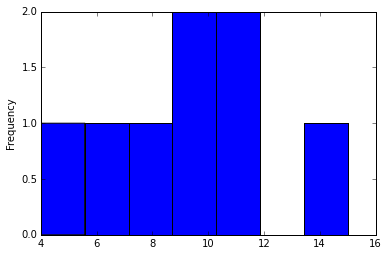

In [70]:
football.wins.plot.hist(bins = 7) #interpretation: there are 7 bins in which the frequency of wins are sorted.
#one team has a win that falls in the 4-5 range 6-7 range, 7-8 range. Two teams have wins that fall in the 9-10 range etc. 

In [68]:
labels = ['4-5', '6-7', '7-8', '9-10', '11-12', '13-14', '15-16']
football['wins_ranges'] = pd.cut(football.wins, 7, right=False, labels=labels)
football #creates a new col wins_ranges that bins all the data in wins col

,year,team,wins,losses,wins_ranges
0,2010,Bears,11,5,11-12
1,2011,Bears,8,8,7-8
2,2012,Bears,10,6,9-10
3,2011,Packers,15,1,15-16
4,2012,Packers,11,5,11-12
5,2010,Lions,6,10,6-7
6,2011,Lions,10,6,9-10
7,2012,Lions,4,12,4-5


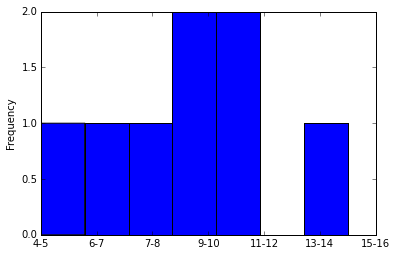

In [74]:
ax = football.wins.plot.hist(7)
ax.set_xticklabels(labels, fontdict=None, minor=False)